<a href="https://colab.research.google.com/github/2403a52009-bot/ML/blob/main/ml_Asn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download the dataset from Kaggle.

2. Load the dataset using Pandas.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Salary_dataset.csv to Salary_dataset.csv
User uploaded file "Salary_dataset.csv" with length 664 bytes


In [ ]:
df = pd.read_csv('Salary_dataset.csv')

3. Display first and last five rows.

In [ ]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.tail(5)

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


4. Identify input and output variables.

   In this dataset, 'YearsExperience' would typically be considered the input (or independent) variable, as it's the factor you'd use to predict something. 'Salary' would be the output (or dependent) variable, as it's the value you're trying to predict based on the years of experience.

5. Separate independent and dependent variables.

In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

print("Independent variable (X):")
display(X.head())

print("\nDependent variable (y):")
display(y.head())

Independent variable (X):


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3



Dependent variable (y):


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


# Task
Convert the `YearsExperience` and `Salary` data from Pandas DataFrames/Series to NumPy arrays, then reshape these arrays for use in a linear regression model, and finally initialize the slope (m) and intercept (b) parameters for the model.

## Convert Data to NumPy Arrays

### Subtask:
Convert the independent variable (X) and dependent variable (y) from Pandas DataFrames/Series to NumPy arrays for easier numerical computation.


**Reasoning**:
To convert the Pandas DataFrame X and Series y into NumPy arrays, I will use the .to_numpy() method and then display their types and first few elements to verify the conversion.



In [ ]:
X_np = X.to_numpy()
y_np = y.to_numpy()

print("Independent variable (X_np) type:", type(X_np))
print("First 5 elements of X_np:\n", X_np[:5])

print("\nDependent variable (y_np) type:", type(y_np))
print("First 5 elements of y_np:\n", y_np[:5])

Independent variable (X_np) type: <class 'numpy.ndarray'>
First 5 elements of X_np:
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]

Dependent variable (y_np) type: <class 'numpy.ndarray'>
First 5 elements of y_np:
 [39344. 46206. 37732. 43526. 39892.]


## Reshape Arrays for Computation

### Subtask:
Reshape the NumPy arrays to ensure they are in the correct format (e.g., 2D arrays) for matrix operations in the linear regression model.


**Reasoning**:
To ensure the arrays are in the correct format for linear regression, I will first check their current shapes and then reshape `y_np` into a 2D column vector if it is 1D, as `X_np` is already 2D.



In [ ]:
print("Original shape of X_np:", X_np.shape)
print("Original shape of y_np:", y_np.shape)

# Reshape y_np to a 2D array (column vector) if it's 1D
if y_np.ndim == 1:
    y_np = y_np.reshape(-1, 1)

print("\nNew shape of X_np:", X_np.shape)
print("New shape of y_np:", y_np.shape)

Original shape of X_np: (30, 1)
Original shape of y_np: (30,)

New shape of X_np: (30, 1)
New shape of y_np: (30, 1)


## Initialize Model Parameters

### Subtask:
Initialize the slope (m) and intercept (b) for the linear regression model. These will be updated during the training process if we were to implement gradient descent, but for now, we'll initialize them for the prediction and cost functions.


**Reasoning**:
I will initialize the slope (m) and intercept (b) to 0 and then print their values to verify the initialization as per the instructions.



In [ ]:
m = 0
b = 0

print(f"Initial slope (m): {m}")
print(f"Initial intercept (b): {b}")

Initial slope (m): 0
Initial intercept (b): 0


## Implement Prediction Equation

### Subtask:
Define a function or code snippet to calculate the predicted values (y_pred) using the linear regression equation: y_pred = m * X + b.


**Reasoning**:
To implement the prediction equation, I will define a function that calculates `y_pred` using the formula `m * X_np + b`, then call this function with the current values of `X_np`, `m`, and `b`, and finally display the first five predicted values.



In [ ]:
def predict_salary(X, m, b):
    y_pred = m * X + b
    return y_pred

y_pred = predict_salary(X_np, m, b)

print("First 5 predicted salary values (y_pred):")
print(y_pred[:5])

First 5 predicted salary values (y_pred):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Implement Cost Function (MSE)

### Subtask:
Define a function or code snippet to calculate the Mean Squared Error (MSE), which is a common cost function for linear regression. MSE = (1/n) * sum((y_pred - y)^2).


**Reasoning**:
I will define the `calculate_mse` function as instructed, which computes the Mean Squared Error between actual and predicted values. Then, I will call this function with `y_np` and `y_pred` to calculate the initial MSE and print the result.



In [ ]:
def calculate_mse(y_actual, y_pred):
    # Ensure y_actual and y_pred are 2D arrays for element-wise operation if they are not already
    if y_actual.ndim == 1:
        y_actual = y_actual.reshape(-1, 1)
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)

    squared_diff = (y_pred - y_actual) ** 2
    mse = np.mean(squared_diff)
    return mse

initial_mse = calculate_mse(y_np, y_pred)
print(f"Initial Mean Squared Error: {initial_mse}")

Initial Mean Squared Error: 6503107277.733334


## Predict Salary using Model

### Subtask:
Use the implemented prediction equation to predict salary values based on the 'YearsExperience' using the current (or later, trained) model parameters.


**Reasoning**:
To predict the salary values as per the subtask, I will call the `predict_salary` function with the independent variable `X_np` and the current `m` and `b` values, store the result, and then display the first five predicted values.



In [ ]:
y_pred_new = predict_salary(X_np, m, b)

print("First 5 predicted salary values (y_pred_new):")
print(y_pred_new[:5])

First 5 predicted salary values (y_pred_new):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Calculate Mean Squared Error

### Subtask:
Calculate the Mean Squared Error between the predicted salaries and the actual salaries to evaluate the model's performance.


**Reasoning**:
To calculate the Mean Squared Error, I will call the already defined `calculate_mse` function with the actual and predicted salary arrays and print the result.



In [ ]:
current_mse = calculate_mse(y_np, y_pred_new)

print(f"Current Mean Squared Error: {current_mse}")

Current Mean Squared Error: 6503107277.733334


## Plot Regression Line with Data Points

### Subtask:
Generate a scatter plot of 'YearsExperience' vs. 'Salary' and overlay the regression line (y_pred) to visually represent the model's fit. Make sure to include proper labels and a legend.


**Reasoning**:
To generate the requested scatter plot with the regression line, I need to import `matplotlib.pyplot` and then use its functions to create the scatter plot, overlay the regression line, add labels, a title, and a legend.



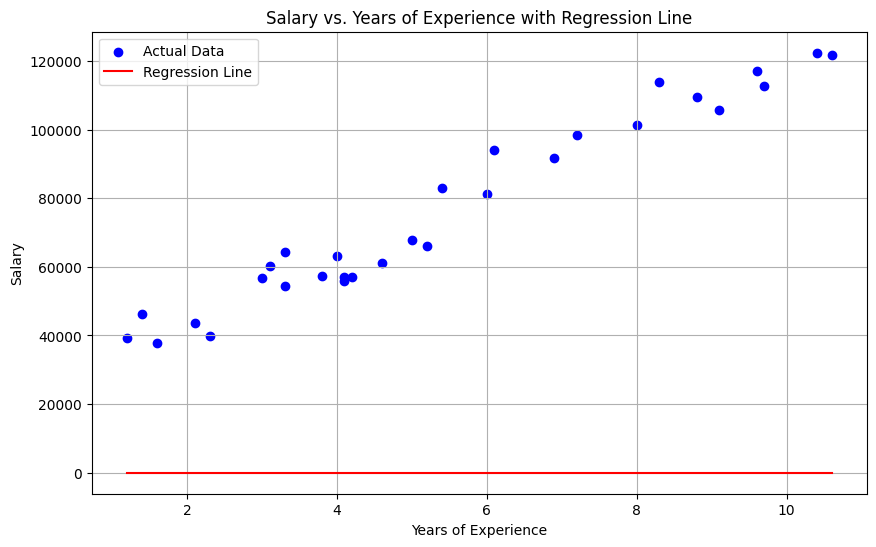

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot for actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X_np, y_np, color='blue', label='Actual Data')

# Overlay the regression line
plt.plot(X_np, y_pred_new, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience with Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
